# June 21st 2021


In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from helpers.classes import Collection

with open('pickles/collection_20210618_170808.pkl', 'rb') as f:
    collection = pickle.load(f)

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## What I've done:

*NOTE*: I hereby refer to publications/ statistical-bulletins as "bulletins". These are published statistical reports that come with a short description (found in a section "Main-Points") and have assigned "Related-Datasets" determined internally by ONS.

1. I wrote an indexer, scrapped publications and related datasets
    - I now have a structured method to find bulletins, with their associated datasets.
    - They are all stored in a Index, so it's quite easy to extract all info you need given the bulletin id (its url)
    - Given that this is automatic, there is some uncertainty on the quality of the "main-points" that are extracted.
    - Also, I've observed that the datasets have very inconsistent structure, so I need to figure out how to find exactly which sheet is the desired one.

2. There are 575 bulletins readily available on the ONS website (it seems that older ones are archived), which 365 are usable$^{*}$
    - I select the top 100 most recent bulletins available in each industry/ topic
    - These are: 
        - "Business Industry and Trade"
        - "Economy"
        - "Employment and Labour Market"
        - "People, Population and Community"

##### $^{*}$*usable bulletins are those that have non-zero/non-empty main-points AND related-datasets*

# Summary

In [91]:
# bulletin_names contains all bulletins collected through scrapping
bulletin_names = list(collection.bulletins.keys())

# target bulletins are those with usable related datasets and main points
target_bulletins = []
for bulletin in bulletin_names:
    if len(collection.bulletins.get(bulletin).get('main-points')) and len(collection.bulletins.get(bulletin).get('related-datasets')) > 0:
        target_bulletins.append(bulletin)

target_points = []
target_datasets = []
for bulletin in target_bulletins:
    entry = collection.bulletins.get(bulletin)
    target_points.append(len(entry.get('main-points')))
    target_datasets.append(len(entry.get('related-datasets')))

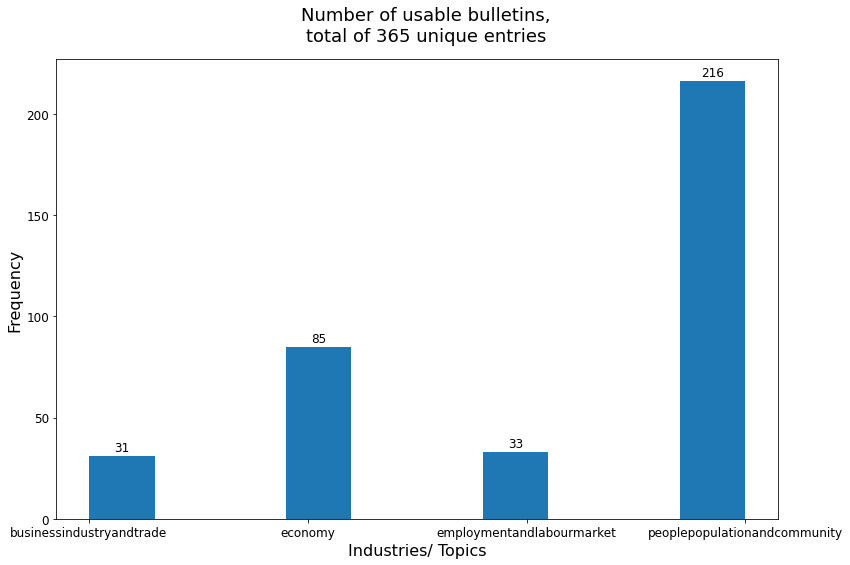

In [92]:
bulletin_names_split = [x.split('/')[:3] for x in target_bulletins]
fig, ax = plt.subplots(1, 1, figsize = (12, 8))
ax.hist([x[0] for x in bulletin_names_split], align = 'mid')

for rect in ax.patches:
    height = rect.get_height()
    if height != 0:
        ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                    xytext=(0, 2), textcoords='offset points', ha='center', va='bottom')
fig.suptitle(f'Number of usable bulletins,\ntotal of {len(target_bulletins)} unique entries')
ax.set_xlabel('Industries/ Topics')
ax.set_ylabel('Frequency')
fig.tight_layout()

From our last discussion, I used the "Main Section" as the primary source of sentences to be used.
- Not all bulletins contained a "Main Section" with usable text. These were skipped during scrapping.
- Some had no listed related datasets, these are removed too as we have nothing to use.
- (I kept a log file with all these bulletins, but I doubt they will be of use. I've read quite a few and I don't see a way to use them)

I present below a graphic that displays how many sentences are seen in the "main-points" section and how many "related-datasets" we have.

In [93]:
# target bulletins are those with usable related datasets and main points
target_bulletins = []
for bulletin in bulletin_names:
    if len(collection.bulletins.get(bulletin).get('main-points')) and len(collection.bulletins.get(bulletin).get('related-datasets')) > 0:
        target_bulletins.append(bulletin)

target_points = []
target_datasets = []
for bulletin in target_bulletins:
    entry = collection.bulletins.get(bulletin)
    target_points.append(len(entry.get('main-points')))
    target_datasets.append(len(entry.get('related-datasets')))

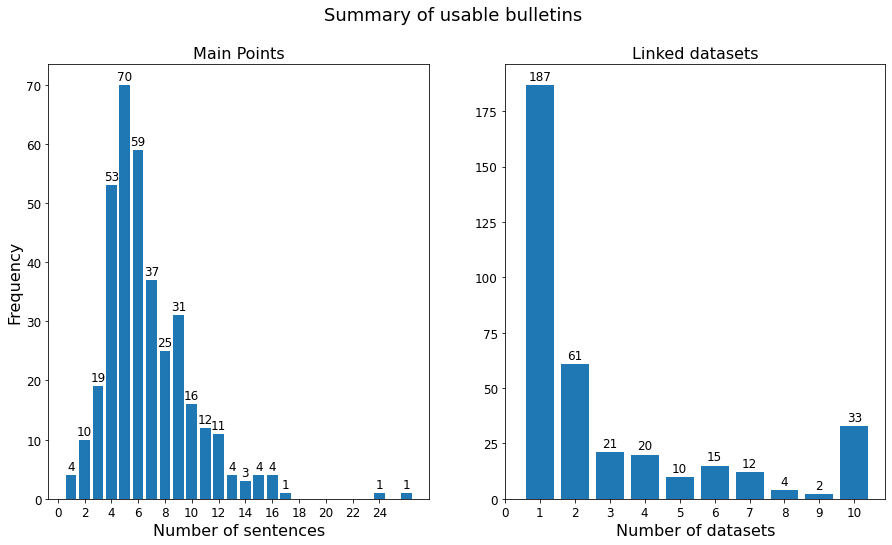

In [94]:
fig, ax = plt.subplots(1,2, figsize = (15,8))
# ax[0].hist(num_main_points)
ax[0].bar(np.unique(target_points, return_counts=True)[0], np.unique(target_points, return_counts=True)[1])
ax[1].bar(np.unique(target_datasets, return_counts=True)[0], np.unique(target_datasets, return_counts=True)[1])
# ax[1].hist(num_related_datasets)
ax[0].set_xticks(np.arange(0, 25, 2))
ax[1].set_xticks(np.arange(0, 11, 1))
ax[0].set_title('Main Points')
ax[1].set_title('Linked datasets')
ax[0].set_xlabel('Number of sentences')
ax[1].set_xlabel('Number of datasets')
ax[0].set_ylabel('Frequency')

for _ax in ax:
    for rect in _ax.patches:
        height = rect.get_height()
        _ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                    xytext=(0, 2), textcoords='offset points', ha='center', va='bottom') 

fig.suptitle('Summary of usable bulletins')
plt.show()

- Most bulletins contain 4-6 sentences that describe the datasets.
- Also, most bulletins (~51%) only assign 1 dataset as relevant.

# Bulletins

To illustrate a usable bulletin and to showcase what I've collected, I take a random bulletin from 
- Section: People, Population and Community 
- Subsection: Births, Deaths and Marriages / Deaths/
- Title: Excess Winter Mortality in Englad and Wales

## A usable bulletin

In [95]:
usable_example = 'peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/bulletins/excesswintermortalityinenglandandwales/2019to2020provisionaland2018to2019final'

main_points = collection.bulletins.get(usable_example).get('main-points')
related_datasets = collection.bulletins.get(usable_example).get('related-datasets')

In [96]:
print('URL: www.ons.gov.uk/' + usable_example)
print('\nMain-points: \n')
_ = [print(f'{i+1}. {x}') for i, x in enumerate(main_points)]
print('\n----------------------------------------')
print('\nRelated-Datasets: \n')
_ = [print(f'{i+1}. {x}') for i, x in enumerate(related_datasets)]

URL: www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/bulletins/excesswintermortalityinenglandandwales/2019to2020provisionaland2018to2019final

Main-points: 

1. We estimate excess winter mortality by comparing the winter months of December to March with the average of the four-month periods before and after; for winter 2019 to 2020 we have excluded deaths where the coronavirus (COVID-19) was mentioned on the death certificate – which is a new disease – from the main figures reported, improving the comparability of this winter's measure with previous years.
2. An estimated 28,300 excess winter deaths occurred in England and Wales in winter 2019 to 2020, which was 19.6% higher than winter 2018 to 2019.
3. The excess winter mortality index (which is used to compare between sexes, age groups and geographical areas) in England was statistically significantly higher than for winter 2018 to 2019, but statistically significantly lower than the 2016 to 2017 and 2017 

### Comments:

1. There are sentences here that contain numeric comparisons. These are easy to identify and can be used for our work.
    - I can look for keywords like: higher, lower, decreased, increased, ...
2. There are sentences that only part of them are of interest (see the first sentence).
    - I need to figure a way to identify these sections of interest within a sentence,
    - I could split each sentence in sections that end with a full-stop and identify if a keyword or percentage sign (%) is seen (or similar).
3. Are sentences like the last usable?
    - They don't necessarily make a hard claim, but you could decompose this to identifying what the factors for winter deaths were, and seeing that Respiratory Diseases were the biggest factor

## A not-so-usable bulletin

In [97]:
unusable_example = 'peoplepopulationandcommunity/wellbeing/articles/exploringlonelinessinchildrengreatbritain/2018'

main_points = collection.bulletins.get(unusable_example).get('main-points')
related_datasets = collection.bulletins.get(unusable_example).get('related-datasets')

In [98]:
print('URL: www.ons.gov.uk/' + unusable_example)
print('\nMain-points: \n')
_ = [print(f'{i+1}. {x}') for i, x in enumerate(main_points)]
print('\n----------------------------------------')
print('\nRelated-Datasets: \n')
_ = [print(f'{i+1}. {x}') for i, x in enumerate(related_datasets)]

URL: www.ons.gov.uk/peoplepopulationandcommunity/wellbeing/articles/exploringlonelinessinchildrengreatbritain/2018

Main-points: 

1. The relationship between children’s loneliness and their circumstances has been explored by seeing if each factor has a relationship when others are taken into account.
2. On average, the odds of children reporting loneliness are increased if:
3. they have low happiness with their relationships with friends
4. they have low happiness with the amount of choice they have
5. their parent or guardian doesn’t have very high life satisfaction
6. they live in a city
7. their household is in relative poverty
8. When taking other factors into account, the following are not significant in children’s reporting of loneliness:
9. age
10. gender
11. ethnicity
12. number of children in the household
13. living in a single parent household
14. living away from parents (such as with another relative)

----------------------------------------

Related-Datasets: 

1. /peop

### Comments

This bulletin shows an issue with our scrapper. As the "Main-Points" section is written in list format, I extract `<li>` tags. Then the above happens...

But:

1. These entries have sentences that are really short
    - I can identify this (with some threshold/ probabilistic approach) to mark these entries
    - Then, I could reconstruct the sentence by either concatenating all subpoints into a big sentence, or generating a usable sentence for all subpoints
2. I can spot a few other methods:
    - There is the use of ":" (colon) and then short sentences. Maybe I can use that
    - Again (thankfully) the usage of the fullstop is kept solely for ending a target sentence. I can leverage this and combine all subpoints together into a long sentence (it wont work for this example but maybe for others?)

### Question

- These "unusable" bulletins (second example), present the findings in a subpoint format. 
- Even if thats the case, I can still see how I can make them usable. **Is it worth to invest some time in trying to get these to look better?**

- Specifically the above states all factors that are responsible for higher chance of reported loneliness. 
- I can then generate N sentences that say "On average, the odds of children reporting loniless increases if X" where X is any of the subpoints

## The ideal bulletin

In [99]:
ideal_example = 'peoplepopulationandcommunity/healthandsocialcare/healthcaresystem/bulletins/ukhealthaccounts/2019'

main_points = collection.bulletins.get(ideal_example).get('main-points')
related_datasets = collection.bulletins.get(ideal_example).get('related-datasets')

In [100]:
print('URL: www.ons.gov.uk/' + ideal_example)
print('\nMain-points: \n')
_ = [print(f'{i+1}. {x}') for i, x in enumerate(main_points)]
print('\n----------------------------------------')
print('\nRelated-Datasets: \n')
_ = [print(f'{i+1}. {x}') for i, x in enumerate(related_datasets)]

URL: www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/healthcaresystem/bulletins/ukhealthaccounts/2019

Main-points: 

1. Total current healthcare expenditure in 2019 was £225.2 billion, equating to £3,371 per person.
2. Total current healthcare expenditure in the UK accounted for 10.2% of gross domestic product (GDP) in 2019, compared with 9.9% in 2018.
3. Total current healthcare spending grew by 4.0% in real terms in 2019, the strongest rate of annual growth since 2009. 
4. Government-financed healthcare expenditure grew by 4.0% in real terms in 2019 to £176.8 billion, making up 79% of total healthcare spending.
5. Spending on total long-term care grew by 2.8% in real terms in 2019, slower than growth in total current healthcare expenditure.

----------------------------------------

Related-Datasets: 

1. /peoplepopulationandcommunity/healthandsocialcare/healthcaresystem/datasets/healthaccountsreferencetables


### Comments

An ideal bulletin presented above. 
- Its sentences are to the point, self contained and easy to work with.
- Numeric comparisons are presented on all sentences
- No additional info/ Not verbose at all
- AND there is only one dataset that is linked to it, so it makes this even simpler

## TL;DR

What do you think?

Should I take the really scrappy approach and only use sentences that have KEYWORDS (higher, lower, increased, decreased, etc) present? Should I ignore bulletins that have really short sentences (those that match the unusable example given above)? 

There is a trade-off between having clean data and the amount of data usable. Already, I feel like this isn't a large dataset. REMINDER I will need to construct "fake"/"counterfactual" statements so arguably this will double. 

## Next Steps:

1. Construct a processing pipeline that will be able to clean all the bulletin sentences (what I discuss above etc)
2. Construct my counterfactual training data. I've read a few papers on this. (I will probably need to investigate more than one method)
3. Figure out a way to find the ACTUAL SHEET of interest within each XLS/XLXS file.

## Appendix (ignore)

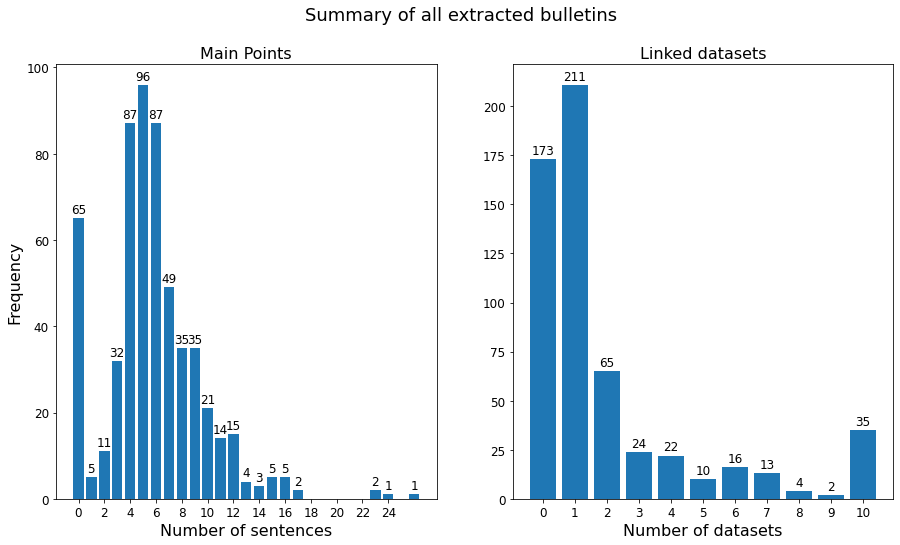

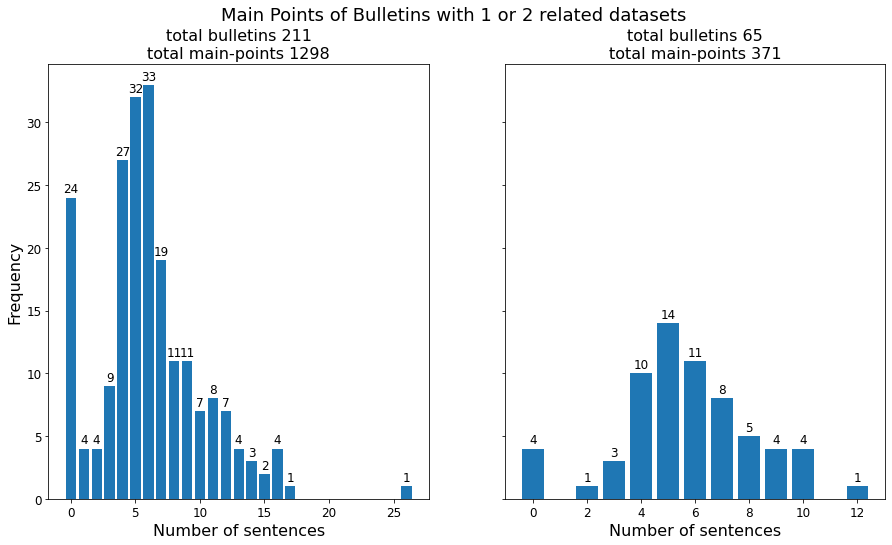

In [101]:
# NOT THE MOST USEFUL
onedata_keys = []
twodata_keys = []
for key in bulletin_names:
    bulletin = collection.bulletins.get(key)
    if len(bulletin.get('related-datasets')) == 1:
        onedata_keys.append(key)
    if len(bulletin.get('related-datasets')) == 2:
        twodata_keys.append(key)

#####


num_main_points = []
num_related_datasets = []
onedata_main_points = []
twodata_main_points = []
for key in bulletin_names:
    bulletin = collection.bulletins.get(key)
    num_main_points.append(len(bulletin.get('main-points')))
    num_related_datasets.append(len(bulletin.get('related-datasets')))
    if key in onedata_keys:
        onedata_main_points.append(len(bulletin.get('main-points')))
    if key in twodata_keys:
        twodata_main_points.append(len(bulletin.get('main-points')))


#####


fig, ax = plt.subplots(1,2, figsize = (15,8))
# ax[0].hist(num_main_points)
ax[0].bar(np.unique(num_main_points, return_counts=True)[0], np.unique(num_main_points, return_counts=True)[1])
ax[1].bar(np.unique(num_related_datasets, return_counts=True)[0], np.unique(num_related_datasets, return_counts=True)[1])
# ax[1].hist(num_related_datasets)
ax[0].set_xticks(np.arange(0, 25, 2))
ax[1].set_xticks(np.arange(0, 11, 1))
ax[0].set_title('Main Points')
ax[1].set_title('Linked datasets')
ax[0].set_xlabel('Number of sentences')
ax[1].set_xlabel('Number of datasets')
ax[0].set_ylabel('Frequency')

for _ax in ax:
    for rect in _ax.patches:
        height = rect.get_height()
        _ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                    xytext=(0, 2), textcoords='offset points', ha='center', va='bottom') 

fig.suptitle('Summary of all extracted bulletins')
plt.show()


#####

fig, ax = plt.subplots(1,2, figsize = (15,8), sharey= True)
# ax[0].hist(onedata_main_points)
ax[0].bar(np.unique(onedata_main_points, return_counts=True)[0], np.unique(onedata_main_points, return_counts=True)[1])
ax[1].bar(np.unique(twodata_main_points, return_counts=True)[0], np.unique(twodata_main_points, return_counts=True)[1])
# ax[1].hist(twodata_main_points)

ax[0].set_xlabel(f'Number of sentences')
ax[0].set_ylabel(f'Frequency')
ax[0].set_title(f'total bulletins {len(onedata_keys)}\ntotal main-points {np.sum(onedata_main_points)}')
ax[1].set_xlabel(f'Number of sentences')
ax[1].set_title(f'total bulletins {len(twodata_keys)}\ntotal main-points {np.sum(twodata_main_points)}')
for _ax in ax:
    for rect in _ax.patches:
        height = rect.get_height()
        _ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                    xytext=(0, 2), textcoords='offset points', ha='center', va='bottom') 
fig.suptitle('Main Points of Bulletins with 1 or 2 related datasets')
plt.show()